<a href="https://colab.research.google.com/github/2020-nlp-c/nlp-deeplearning/blob/master/tkyang/Word2vec%EA%B5%AC%ED%98%84_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CBoW

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
text = 'you will never know until you try'
t_tokens = text.split()
uni_tokens = np.unique(t_tokens)
t_tokens

['you', 'will', 'never', 'know', 'until', 'you', 'try']

In [ ]:
# 일단 레이블 인코딩 과정을 거쳐서 문자열에 숫자 하나씩 매칭 시켜줘야 함
encoder = LabelEncoder()
encoder.fit(t_tokens)
labels = encoder.transform(t_tokens)

# 2차원 배열로 전환
labels = labels.reshape(-1, 1)

# OneHotEncoder 함수를 변수에 할당시켜서 데이터를 fit 시킨다.
onehot_enc = OneHotEncoder()
onehot_enc.fit(labels)
onehot_enc = onehot_enc.transform(labels)
onehot_enc = onehot_enc.toarray()
onehot_enc

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
# train data X생성, Y생성
window_size = 1

X = []
Y = []
for i in range(len(onehot_enc)):
    for j in range(i-window_size, i+window_size+1):
        if j < 0:
            continue
        if j >= len(onehot_enc):
            break
        if j != i:
            X.append(onehot_enc[j])
            Y.append(onehot_enc[i])
            
Y = np.array(Y)
X = np.array(X)

In [ ]:
# W초기화
Hidden_node = 4
W1 = np.random.randn(len(uni_tokens), Hidden_node)
W2 = np.random.randn(Hidden_node,len(uni_tokens))

def Softmax(x):
    return np.exp(x) / sum(np.exp(x))

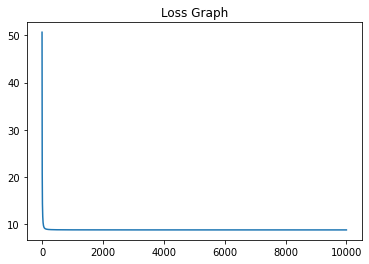

In [ ]:
epoch = 10000
loss_ls = []
for epoch in range(epoch):
    
    # Feed Forward
    H = np.dot(X, W1)
    o1 = np.dot(H, W2)
    o = []
    for i,v in enumerate(o1):
        o.append(Softmax(v))

    loss_ls.append(-np.multiply(Y, np.log(o)).sum())
    
    dW2 = np.dot(H.T, (o-Y))
    dW1 = np.dot(X.T, np.dot(W2, (o-Y).T).T)

    # gradient descent
    learning_rate = 0.03
    W2 += -learning_rate * dW2
    W1 += -learning_rate * dW1

def Loss_graph(loss_ls):
    plt.plot(loss_ls)
    plt.title('Loss Graph')
    plt.show()

Loss_graph(loss_ls)

In [ ]:
W1

array([[-1.42955883,  2.15852824,  1.22652365, -0.75143155],
       [ 2.3531322 , -0.489417  , -2.3291844 , -0.91189815],
       [ 1.55273799, -0.54562376,  1.28962375,  1.98995152],
       [ 1.63491124, -0.25854624, -1.06074138,  2.58286963],
       [ 1.41703513,  1.67284402,  1.79750945,  0.98759721],
       [-0.62934149, -1.33293949,  0.03246187, -2.66978346]])

## 유사도 계산 및 시각화

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors) :
  def cosine_similarity(a, b) : 
    return dot(a, b)/(norm(a)*norm(b))

  n_word = len(vectors)
  similarity_matrix = np.zeros((n_word, n_word))

  for i in range(n_word) :
    for j in range(i, n_word) :
      similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4)  

  return similarity_matrix

In [ ]:
word2vec_simil = calc_similarity_matrix(W1)
word2vec_simil

array([[ 1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [-0.6416,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [-0.3873, -0.0896,  1.    ,  0.    ,  0.    ,  0.    ],
       [-0.6384,  0.3632,  0.6886,  1.    ,  0.    ,  0.    ],
       [ 0.3428, -0.2469,  0.6429,  0.2595,  1.    ,  0.    ],
       [ 0.0076,  0.1447, -0.6271, -0.7692, -0.6225,  1.    ]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix) :
  uniform_data = similarity_matrix
  mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
  plt.rcParams['figure.figsize'] = [8, 6]
  ax = sns.heatmap(uniform_data, mask=mask, #xticklabels=features, yticklabels=features, 
                  annot=True, fmt=".2f",annot_kws={'size':8}, cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


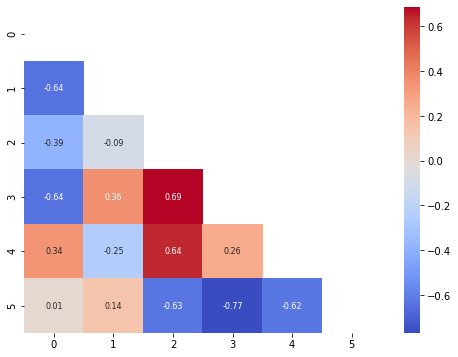

In [ ]:
visualize_similarity(word2vec_simil)

## never와 know의 유사도가 0.69로 가장 높은 유사도를 보인다.

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
  np.set_printoptions(suppress=True)
  T = tsne.fit_transform(vectors)
  #labels = vocab

  plt.figure(figsize=(10, 6))
  plt.scatter(T[:, 0], T[:, 1], c='yellow', edgecolors='r')
  for label, x, y in zip(labels, T[:, 0], T[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

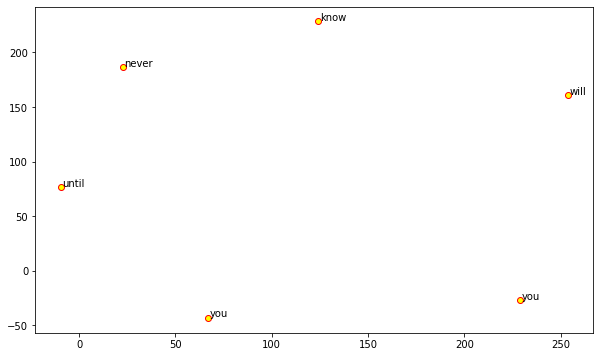

In [ ]:
label_name = t_tokens
visualize_vectors(W1, label_name)